# Анализ компьютерных игр

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Цель анализа:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План работы:**

1. Загрузим файлы и изучим общую информацию.


2. Выполним предобработку данных. Ознакомимся с данными в таблицах и подготовим для дальнейшей работы:  
    2.1.Проверим названия столбцов;  
    2.2.Преобразуем данные в нужные типы;  
    2.3.Обработаем пропуски;  
    2.4.Проверим на наличие дубликатов;  
    2.5.Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.


3. Проведем исследовательский анализ данных:  
    3.1 Посмотрим, сколько игр выпускалось в разные годы.  
    3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
    3.3 Выберем несколько потенциально прибыльных платформ.  
    3.4 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
    3.5 Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
    Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Соотнесем выводы с продажами игр на других платформах.  
    3.6 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    
    
4. Составим портрет пользователя каждого региона (NA, EU, JP):  
    4.1 Самые популярные платформы (топ-5). Опишем различия в долях продаж.  
    4.2 Самые популярные жанры (топ-5).  
    4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
    
5. Сформулируем и проверим гипотезы:  
    5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    
6. Сделаем общий вывод.

## Загрузим файлы и изучим общую информацию.

In [ ]:
# Добавим новые библиотеки:
!pip install jupyter-black
!pip install seaborn

In [2]:
import jupyter_black
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import warnings

In [3]:
# Изучаем данные файла
data_games = pd.read_csv("/datasets/games.csv")
display(data_games.head())
data_games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Посмотрим данные в 'Critic_Score', чтобы понять, нужны ли изменения в типе данных:
data_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [5]:
# Посмотрим данные в 'User_Score', чтобы понять, нужны ли изменения в типе данных:
data_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### **ВЫВОД:** 

- Датафрейм содержит: 16715 записей, 11 столбцов.
- Необходимо привести названия всех столбцов к нижнему регистру для удобства работы с ними.
- Датафрейм содержит типы данных float64(6), object(5). Необходимо внести изменени:
    - Столбец 'Year_of_Release' представляет собой целое число и обозначает конкретный год выпуска. Замена типа данных с float на int64 более логично отразит природу данных. 
    - Столбец 'Critic_Score' содержит целые числа. Замена типа данных с float на int64 более логично отразит природу данных.
    - Столбец 'User_Score' содержит числовые значения, но его тип данных — object. Для удобства работы необходимо преобразовать его в тип float. **Термин 'tbd'** можно расшифровать как to be determined (будет определено) или to be discussed (выносится на обсуждение), то есть в контексте столбца это означает, что оценки пользователя на момент выгрузки данных нет. Можно заменить на 'pd.NA', который был введен для унифицированного представления пропусков в различных типах данных.
- В столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating присутствуют пропуски. Нужно ближе рассмотреть данные, чтобы понять, как пропуски обработать.

## Выполним предобработку данных

### Внесем изменения в названия столбцов

In [6]:
# Преобразуем названия всех столбцов к нижнему регистру:
data_games.columns = data_games.columns.str.lower()
display(data_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразуем данные в нужные типы

In [7]:
# Столбец 'year_of_release' в тип int:
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64')

# Преобразуем 'tbd' в NA в столбце 'user_score':
data_games['user_score'] = data_games['user_score'].replace('tbd', pd.NA)

# Столбец 'critic_score' в тип int:
data_games['critic_score'] = data_games['critic_score'].astype('Int64')

# Столбец 'user_score' в тип float:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Обработаем пропуски

Посмотрим, какой % составляют пропуски от общего количества данных:

In [8]:
percentage_of_missing_values = (data_games.isna().sum() / len(data_games)) * 100
percentage_of_missing_values

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

#### **ВЫВОД:** 

- столбцы 'name', 'year_of_release', 'genre' содержат очень маленький процент пропусков, но прежде чем удалять строки, лучше просмотреть данные. 
- cтолбцы 'critic_score', 'user_score', 'rating' содержат около половины пропусков. Такие данные мы не можем удалять, так как это приведет к искажению анализа. Заполнение пропусков каким-либо числовым значением также не является приемлемым решением, поскольку данные в этих столбцах представляют собой индивидуальные оценки и рейтинг для каждой игры, которые не могут быть перенесены на пропущенные записи без утраты точности и валидности данных.
- В столбцах critic_score, user_score, и rating пропуски можно заменить значением 'NA', которое было введено для унифицированного представления пропусков в различных типах данных. Это позволит сохранить информацию о наличии пропусков, не искажая данные.

In [9]:
# Выводим строки с пропущенными значениями в столбце 'name'
missing_name_rows = data_games[data_games['name'].isna()]
missing_name_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


**Промежуточный вывод:** две строки содержат очень много пропусков и не представляют значимость для исследования. Их можно удалить. Таким образом мы полностью удалим пропуски и в стобце 'genre'.

In [10]:
# Удаляем строки и сбрасываем индекс:
data_games = data_games.dropna(subset=['name']).reset_index(drop=True)

In [11]:
# Проверяем изменения в пропусках:
percentage_of_missing_values = (data_games.isna().sum() / len(data_games)) * 100
percentage_of_missing_values

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64

In [12]:
# Выводим строки с пропущенными значениями в столбце 'year_of_release':
missing_name_rows = data_games[data_games['year_of_release'].isna()]
missing_name_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


**Промежуточный вывод:** Столбец содержит 269 строк с пропусками. Мы видим, что в некоторых названиях содержится год игры. Давайте добавим его в 'year_of_release', где это возможно.

In [13]:
# Создаем функцию для извлечения года из названия:
import re
def extract_year_from_name(name):
    match = re.search(r'(\d{4})', name)
    if match:
        return int(match.group(1))
    return np.nan

# Применяем функцию к строкам с пропущенными значениями в 'year_of_release'
missing_years = data_games['year_of_release'].isna()
data_games.loc[missing_years, 'year_of_release'] = data_games.loc[missing_years, 'name'].apply(extract_year_from_name)

# Посмотрим, как заполнились данные в 'year_of_release' в строках 183, 377, 16371, которые содержали год в названии:
indices_to_check = [183, 377, 16371]
data_games.loc[indices_to_check]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84,6.4,E
16371,PDC World Championship Darts 2008,PSP,2008,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+


In [14]:
# Повторно проверяем пропуски в 'year_of_release':
missing_name_rows = data_games[data_games['year_of_release'].isna()]
missing_name_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73,NaN,E
677,LEGO Indiana Jones: The Original Adventures,Wii,<NA>,Action,1.51,0.61,0.00,0.21,78,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


**Промежуточный вывод:** мы видим, что количество строк с пропусками уменьшилось до 252, то есть мы заполнили данные в 17 строках. Так как для дальнейшего анализа нам будет важен год выпуска, то остальные строки мы можем удалить, они представляют менее 1.6 % от общего количества данных. В остальных стобцах заменим пропуски на pd.NA.

In [15]:
# Удалим строки с пропусками в year_of_release:
data_games = data_games.dropna(subset=['year_of_release']).reset_index(drop=True)

# Заменяем пропуски на pd.NA:
# в critic_score:
data_games['critic_score'] = data_games['critic_score'].replace({np.nan: pd.NA})

# в user_score:
data_games['user_score'] = data_games['user_score'].replace({np.nan: pd.NA})

# в rating:
data_games['rating'] = data_games['rating'].replace({np.nan: pd.NA})

# Преобразуем столбцы обратно в числовые типы данных:
data_games['critic_score'] = data_games['critic_score'].astype('Int64')
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

# Cмотрим результат:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  Int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   Int64  
 9   user_score       7473 non-null   float64
 10  rating           9779 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Проверим на наличие дубликатов

In [16]:
# Проверяем на явные дубликаты:
data_games.duplicated().sum()

0

In [17]:
# Проверяем на неявные дубликаты по столбцам 'name', 'platform':
data_duplicated = data_games.duplicated(subset=['name', 'platform'], keep=False)
data_games[data_duplicated]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
1180,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1577,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5894,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11546,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
15985,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E


**Промежуточный вывод:**  мы нашли неявный дубликат:
- Игра Madden NFL 13 с индексом 603 и 15985 (одинаковая платформа, год релиза, оценки критиков)

В итоге удалим строку с индексом 15985, в которой почти отсутствуют продажи.

In [18]:
# Удаляем строку с индексом 15985 и делаем сброс индексов:
data_games = data_games.drop(index = 15985).reset_index(drop=True)

# Проверяем изменения:
data_duplicated = data_games.duplicated(subset = ['name', 'platform'], keep=False)
data_games[data_duplicated]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1180,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1577,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5894,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11546,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T


In [19]:
# Смотрим, какой процент данных был удален:
shape_initial = 16715 # изначальное количество строк
shape_final = data_games.shape[0]

percent_deleted = ((shape_initial - shape_final) / shape_initial) * 100

# Вывод результатов
print("Финальный shape:", shape_final)
print("Процент удаленных данных: {:.2f}%".format(percent_deleted))

Финальный shape: 16460
Процент удаленных данных: 1.53%


### Посчитаем суммарные продажи во всех регионах

In [20]:
# Подсчитываем и записываем суммарные продажи в отдельный столбец:
data_games['total_sales'] = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,<NA>,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,<NA>,31.38


### Характеристика датасета

In [21]:
# Посмотрим основные характристики финального датасета:
data_games.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16460.0,2006.485298,5.873339,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16460.0,0.264283,0.818662,0.0,0.00,0.08,0.24,41.36
eu_sales,16460.0,0.146101,0.506827,0.0,0.00,0.02,0.11,28.96
jp_sales,16460.0,0.078432,0.310960,0.0,0.00,0.00,0.04,10.22
other_sales,16460.0,0.047679,0.188047,0.0,0.00,0.01,0.03,10.57
critic_score,7994.0,69.001376,13.925213,13.0,60.00,71.00,79.00,98.00
user_score,7472.0,7.128011,1.499178,0.0,6.40,7.50,8.20,9.70
total_sales,16460.0,0.536495,1.558786,0.0,0.06,0.17,0.47,82.54


In [22]:
# Некорркетный код:
# Построим гистограммы для численных столбцов из "data_games":
# data_games.select_dtypes(include=['int64','float64']).hist(figsize=(15,20))
# plt.show()

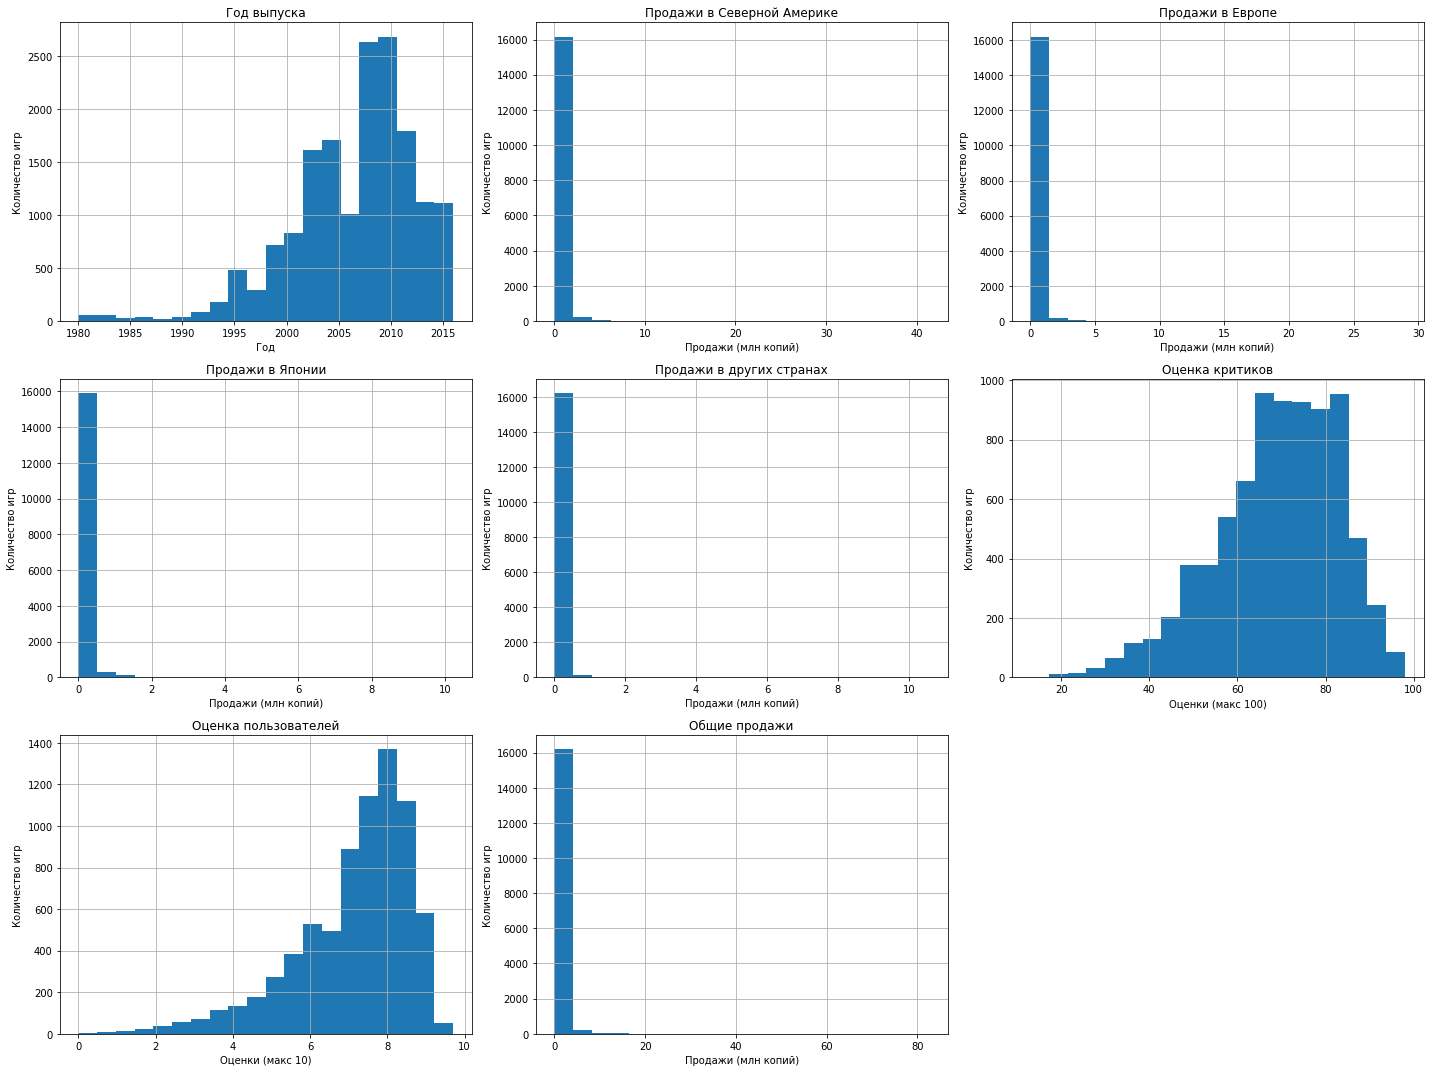

In [23]:
# Исправленный код:
# Создаем список параметров для построения гистограмм:
columns = [
    ('year_of_release', 'Год выпуска', 'Год'),
    ('na_sales', 'Продажи в Северной Америке', 'Продажи (млн копий)'),
    ('eu_sales', 'Продажи в Европе', 'Продажи (млн копий)'),
    ('jp_sales', 'Продажи в Японии', 'Продажи (млн копий)'),
    ('other_sales', 'Продажи в других странах', 'Продажи (млн копий)'),
    ('critic_score', 'Оценка критиков', 'Оценки (макс 100)'),
    ('user_score', 'Оценка пользователей', 'Оценки (макс 10)'),
    ('total_sales', 'Общие продажи', 'Продажи (млн копий)')
]

# Устанавливаем количество строк и столбцов:
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Создаем цикл для построения гистограмм:
for i, (column, title, xlabel) in enumerate(columns):
    ax = axes[i // n_cols, i % n_cols]
    data_games[column].hist(bins=20, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Количество игр')

# Удаляем пустые подграфики:
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

### **ВЫВОД по 2 шагу:** 

- Мы преобразовали названия всех столбцов к нижнему регистру;
- Мы изменили тип данных в стобцах 'year_of_release' (на int64), 'critic_score' (на int64), 'user_score'(на float);
- Обработали пропуски:  
    - удалили 2 строки в столбцах 'name', 'genre';
    - дополнили данные в 'year_of_release' годами из названий игр и удалили остальные пропуски;
    - заменили пропуски в 'critic_score', 'user_score', 'rating' и 'tbd' на 'pd.NA' для унифицированного представления пропусков в различных типах данных. Это позволит сохранить информацию о наличии пропусков, не искажая данные.  
- Удалили 1 неявный дубликат.
- Всего удалили 1.53% от изначального количества данных.
- Добавили новый столбец 'total_sale' c суммарными продажами во всех регионах.

**Причины появления пропусков:** 
- столбцы 'name','genre', 'year_of_release': небольшое количество пропусков может быть связаны с человеческим фактором (некорректное заполнение данных, сложность в определении жанра) или отсутствием информации в открытых источниках.  
- столбцы 'critic_score', 'user_score': игра не была достаточно интересна или популярна, чтобы привлечь внимание для оценки пользователями или критиками. Или на момент создания данных игра недавно вышла и не успела получить оценки. Могли быть также технические ошибки при сохранении данных или человеческий фактор.  
- 'rating': ESRB (Entertainment Software Rating Board),ассоциация, определяющая возрастной рейтинг компьютерных игр была основана в September 16, 1994 для США и Канады, поэтому игры, выпущенные ранее, могли не иметь рейтинга или были выпущены в других странах.

**Характеристики финального датасета на основе .describe().T и гистограмм:** 
- 'year_of_release': в датасете представлены игры с 1980 по 2016 годы. Большинство игр выпущены после 2000 года, пик приходится на период 2005-2010 годов, что может говорить о росте игровой индустрии в этот период.

Мы можем видеть следующее распределение продаж: наиболее высокие продажи в Северной Америке, затем в Европе и наименьшие в Японии и других регионах. Распределение сильно смещено вправо, что указывает на наличие небольшого числа игр с очень высокими продажами:
- 'na_sales': средние продажи составляют 0.264 млн копий. Большинство значений значительно меньше 1 млн копий, также содержатся выбросы в десятки миллионов копий. Максимальные продажи достигают 41.36 млн копий.
- 'eu_sales': большинство значений также меньше 1 млн копий, содержатся выбросы в десятки миллионов копий. Средние продажи составляют 0.146 млн копий. Максимальные продажи меньше, чем в NA и достигают максимум 28.96 млн копий.
- 'jp_sales': большинство значений также меньше 1 млн копий с меньшим количеством выбросов. Средние продажи составляют 0.078 млн копий. Максимальные продажи достигают 10.22 млн копий.
- 'other_sales': большинство значений в других регионах также меньше 1 млн копий, средние продажи составляют 0.048 млн копий. Максимальные продажи достигают 10.57 млн копий.
- 'total_sales': средние суммарные продажи составляют 0.536 млн копий, максимальные суммарные продажи достигают 82.54 млн копий.

Большинство игр получают оценки в диапазоне 65-80 от критиков и 6-8 от пользователей. Это означает, что оценки в большинстве своем положительные. 
- 'critic_score': ни одна из игр не получила 100 максимально возможных баллов. Максимальная оценка в датасете = 98 баллов. Средняя оценка критиков составляет 69 баллов (пик около 65-80), а минимальная = 13.
- 'user_score': ни одна из игр не получила 10 максимально возможных баллов. Максимальная оценка от пользователей = 9.7. Средняя оценка составляет 7.1 (пик около 6-8), а минимальная = 0.

## Проведем исследовательский анализ данных

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [25]:
games_per_year = data_games['year_of_release'].value_counts().sort_index()
games_per_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1427
2010    1255
2011    1137
2012     652
2013     545
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

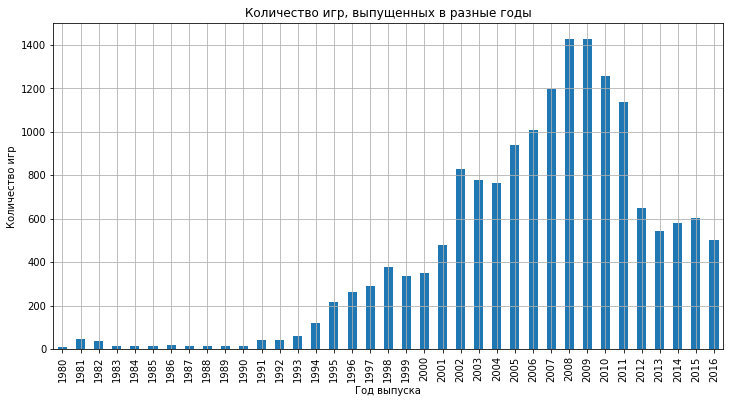

In [26]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

#### **ВЫВОД:** 

**Cколько игр выпускалось в разные годы:**
- С 1980 по 1993 годы игровая индустрия только начинала развиваться и выпускалось от 9 до 60 игр.
- С 1994 года по 2001 год мы наблюдаем относительно стабильный рост игр от 121 релиза в год до 482 (в 2001 г).
- Далее мы видим резкий рост с 2002 года (830 игр против 482 в 2001 году), который достиг пика в 2008-2009 годах (1429 и 1427 игр соответственно). 
- Начиная с 2010 года (1255 игр), количество выпущенных игр начало снижаться: 2011 год - 1137 игр и резкое падение почти в два раза в 2012 году (652 игры).
- Тем не менее, несмотря на общий спад, последние 5 лет наблюдается относительно стабильное количество релизов: диапазон от 502 до 652 игр в год.

**Важны ли данные за все периоды?**  
Напомним **цель проекта:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

- Рынок и аудитория постоянно меняются. Тип пользователя, его предпочтения и потребности могут сильно отличаться от тех, что были 5-10 лет назад. Таким образом данные за 1980-2011 годы точно не релевантны для современного анализа. Качество игр, их сложность и тех.требования значительно изменились. Старые игры не могут служить адекватной основой для понимания текущих потребностей и предпочтений пользователей.
- Начиная с 2012 года, количество выпускаемых игр начало снижаться. Анализ игр, выпущенных в период спада, может дать лучшее понимание того, какие игры и стратегии остаются успешными даже в условиях снижения общего объема релизов, что особенно важно для планирования на 2017 год.

### Как менялись продажи по платформам?

**Задача:** Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.  
За какой характерный срок появляются новые и исчезают старые платформы?

In [27]:
# Считаем суммарные продажи по платформам:
platform_total_sales = data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
platform_total_sales

platform
PS2     1247.28
X360     961.30
PS3      931.33
Wii      891.18
DS       802.79
PS       727.58
PS4      314.14
GBA      312.88
PSP      290.34
3DS      257.81
Name: total_sales, dtype: float64

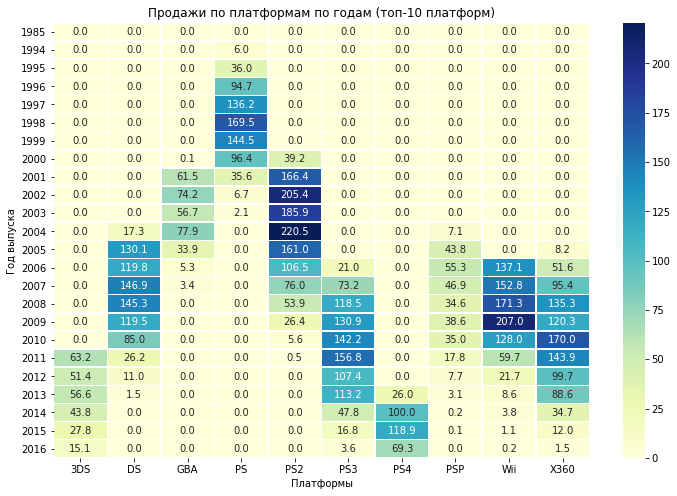

In [28]:
# Создаем новую переменную с отфильтрованными данными по выбранным платформам:
top_platforms = platform_total_sales.index
data_top_platforms = data_games[data_games['platform'].isin(top_platforms)]

# Создаем сводную таблицу для тепловой карты:
platform_year_sales = data_top_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Построим тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(platform_year_sales, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Продажи по платформам по годам (топ-10 платформ)')
plt.xlabel('Платформы')
plt.ylabel('Год выпуска')
plt.show()

In [ ]:
temp = data_games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### **ВЫВОД:** 

**Платформы с наибольшими суммарными продажами:**  
На тепловой карте видно, что платформы PS2, X360, PS3, Wii, DS, PS показывали наибольшие суммарные продажи в разные годы.

**За какой характерный срок появляются новые и исчезают старые платформы?**
- Средний срок появления новых платформ составляет около 7 лет.
- В среднем, новые платформы начинают показывать рост продаж через 1-2 года после выпуска. 
- После 5-7 лет успешных продаж у платформ начинается спад. Период спада может длиться 2-3 года, после чего платформы полностью исчезают с рынка.

Таким образом, для анализа успешности игр и планирования рекламных кампаний на 2017 год важно сосредоточиться на данных за последние 4 года максимум (период 2013 - 2016 годы), чтобы учитывать быстрое развитие технологий, современные тенденции и изменения на рынке.

### Какие платформы лидируют по продажам, растут или падают?

Делаем последующий анализ на основе актуальных данных: период 2013 - 2016 годы.

In [30]:
# Создадим новый датафрейм, состоящий из актуальных данных за период 2013 - 2016 годы:
data_recent_years = data_games[data_games['year_of_release'] >= 2013]

display(data_recent_years.head())
print(data_recent_years.shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,<NA>,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,<NA>,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


(2234, 12)


In [31]:
# Считаем суммарные продажи по платформам:
platform_recent_sales = data_recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_recent_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.78
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

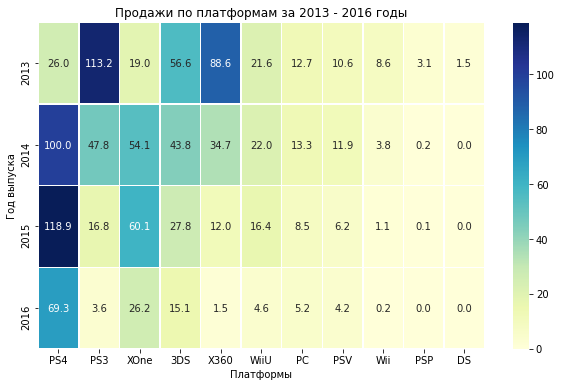

In [32]:
# Создаем новую переменную с отфильтрованными данными по выбранным платформам:
top_recent_platforms = platform_recent_sales.index
data_top_recent_platforms = data_recent_years[data_recent_years['platform'].isin(top_recent_platforms)]

# Создаем сводную таблицу для тепловой карты:
platform_recent_years_sales = data_top_recent_platforms.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').fillna(0)
# Сортируем платформы по суммарным продажам в порядке убывания:
platform_sorted = platform_recent_years_sales[platform_recent_sales.index]

# Построим тепловую карту:
plt.figure(figsize=(10, 6))
sns.heatmap(platform_sorted, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Продажи по платформам за 2013 - 2016 годы')
plt.xlabel('Платформы')
plt.ylabel('Год выпуска')
plt.show()

#### **ВЫВОД:** 

**Какие платформы лидируют по продажам?**
Из данных за период 2013-2016 годов видно, что лидерами по суммарным продажам являются платформы:
- PS4: 314.14 млн копий
- PS3: 181.43 млн копий
- XOne: 159.32 млн копий
- 3DS: 143.25 млн копий
- X360: 136.80 млн копий

Учитывая выводы, что в среднем, новые платформы начинают показывать рост продаж через 1-2 года после выпуска, и что после 5-7 лет успешных продаж у платформ начинается спад,  
мы можем предположить следующее:  

**Какие платформы растут?**
- Продажи PlayStation 4 в США и Канаде стартовали 15 ноября 2013 года. Выпуск PS4 демонстрирует стабильный рост с момента выпуска. Несмотря на снижение в 2016 году, в целом жизненный цикл платформы находится в стадии зрелости и у платформы есть основания несколько лет оставаться лидером продаж и возможно показать рост.
- Первые продажи приставки Xbox One начались 22 ноября 2013 года в США, Канаде. Продажи этой платформы также показывают рост. Несмотря на снижение в 2016 году, в целом жизненный цикл платформы находится в стадии зрелости и у платформы есть основания несколько лет показывать рост или стабильные высокие продажи.
- Консоль WiiU вышла в 2012 году. Платформа показывает пик продаж во второй и третий годы, однако общий уровень продаж ниже, чем у лидеров. Хотя возможно некоторое увеличение стабильности, значительного роста не ожидается.

**Какие платформы падают?**
- Продажи PS3 были на пике в 2013 году и далее показывают спад, что ожидаемо, так как PS4 взяла на себя лидирующие позиции. Прогнозы показывают, что PS3 уйдет с рынка.
- 3DS, X360 (заменяется на XOne) показывают ежегодное устойчивое снижение продаж. Платформы теряют свою популярность, это означает, что ЖЦТ (Жизненный цикл товара) заканчивается.
- PSV, Wii, PSP и DS: продажи очень низкие или практически отсутствуют, что указывает на окончание жизненного цикла этих платформ.

**Стабильность:**
- PC: На протяжении всего периода мы наблюдаем относительно стабильные продажи. В 2016 году они находятся на 4 месте среди популярных платформ.

**Если выбрать топ-5 потенциально прибыльных платформ:**
- PlayStation 4;
- Xbox One;
- 3DS (несмотря на снижение продаж, платформа все равно остается одной из самых прибыльных (3 место в 2015 и 2016 году))
- Консоль WiiU: платформа еще не достигла конца своего жизненного цикла и может показывать стабильные продажи;
- PC: дает стабильную ежегодную прибыль и имеет длительный жизненный цикл. 

### Построим график «ящик с усами» по глобальным продажам игр.

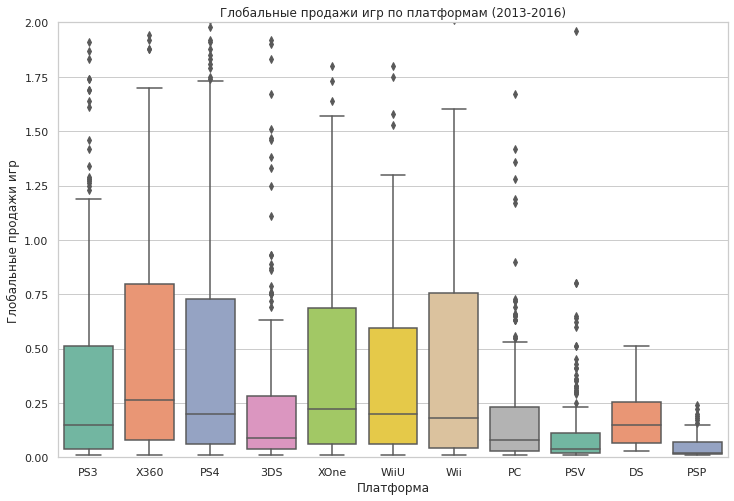

In [33]:
# Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

global_sales = sns.boxplot(x='platform', y='total_sales', data=data_recent_years, palette='Set2')
global_sales.set_ylim(0, 2)
global_sales.set_title('Глобальные продажи игр по платформам (2013-2016)')
global_sales.set_xlabel('Платформа')
global_sales.set_ylabel('Глобальные продажи игр')

plt.show()

<font color='DarkMagenta'>👉 <b>вторая</b> диаграмма размаха со всеми максимумами продаж за актуальный период, смотрим выбросы:</font>
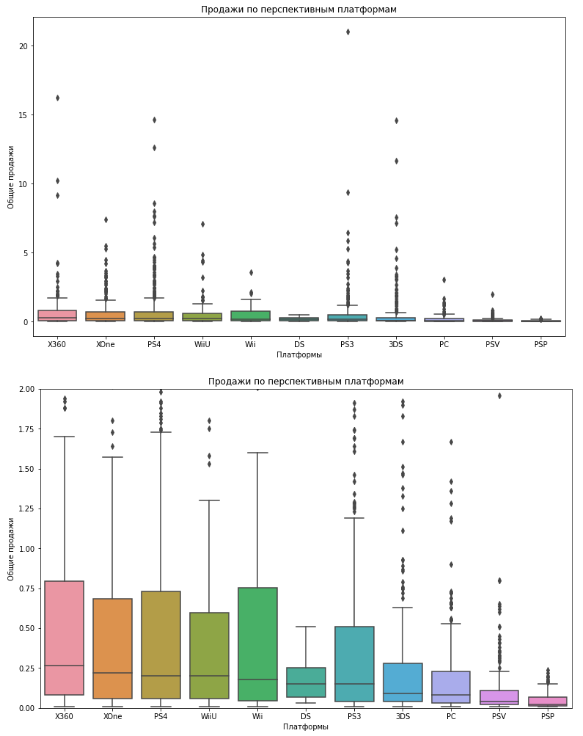

In [34]:
platform_sales_stats = data_recent_years.groupby('platform')['total_sales'].describe().sort_values(by='50%', ascending=False)
platform_sales_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,186.0,0.735484,1.663275,0.01,0.0800,0.265,0.7950,16.27
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
PC,190.0,0.209368,0.351521,0.01,0.0300,0.080,0.2300,3.05


#### **ВЫВОД:** 

В основном у всех платформ пик продаж пришелся на первые годы после выпуска.
Платформы с высокими медианными продажами имеют более широкий размах, что говорит и о наличии хитов, и о менее успешных играх.

- Платформы с самыми высокими медианными продажами:
Xbox 360, Xbox One и PlayStation 4 (0.200 млн копий): медиана глобальных продаж составляет свыше 0.200 млн копий, что указывает на стабильный спрос и популярность этих платформ в течение рассматриваемого периода.  
WiiU (0.200 млн копий) также показывает хорошие результаты, однако стоит отметить, что её объем продаж не столь высок, как у лидеров.

- Платформы со средними медианными продажами:
Wii(0.180 млн копий), DS(0.150 млн копий), PS3 (0.150 млн копий).  
DS является платформой с ограниченным количеством новых игр, что влияет на её позиции.  
PS3 демонстрирует хорошие результаты, но жизненный цикл платформы уже близится к завершению из-за появления PS4.

- Платформы с низкими медианными продажами:
3DS (0.090 млн копий), PC (0.080 млн копий). Однако PC отличается стабильностью и долгосрочной популярностью благодаря разнообразию игр и постоянной поддержке.

- Платформы, у которых жизненный цикл заканчивается:
PSV (0.040 млн копий), PSP (0.020 млн копий).

Почти все платформы имеют выбросы, то есть игры, которые стали очень популярными и принесли максимальную прибыль. Например, как видно из "усов" на графике, продажи отдельных игр могут достигать более 1.5 миллионов копий. 
PS3 имеет наибольшее максимальное значение продаж одной игры — 21.05 миллионов копий, что является наивысшим среди всех платформ за этот период.

<font color='DarkMagenta'>👉 Расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
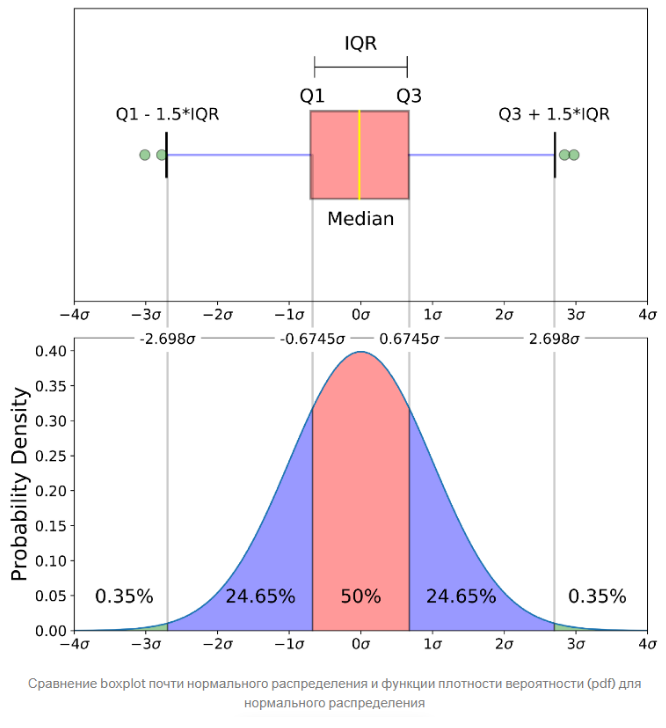

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [35]:
# Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для PlayStation 4:
# Фильтруем данные по платформе:
ps4_data = data_recent_years[data_recent_years['platform'] == 'PS4']

In [36]:
warnings.filterwarnings('ignore')
# Коммент: у меня появлялась ошибка: AttributeError: 'float' object has no attribute 'shape', 
# поэтому я ниже поработала с типом данных и пропущенными значениями, и ошибка ушла:

# Преобразуем оценки пользователей из строки в числовой формат:
ps4_data.loc[:, 'user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

# Удаляем строки с пропущенными значениями в столбцах 'critic_score' и 'user_score':
ps4_data_clean_critic = ps4_data.dropna(subset=['critic_score', 'total_sales'])
ps4_data_clean_user = ps4_data.dropna(subset=['user_score', 'total_sales'])

# Приводим тип данных к float:
ps4_data_clean_critic.loc[:, 'critic_score'] = ps4_data_clean_critic['critic_score'].astype(float)
ps4_data_clean_user.loc[:, 'user_score'] = ps4_data_clean_user['user_score'].astype(float)

# Количество строк до и после очистки данных:
print(ps4_data.shape[0])
print(ps4_data_clean_critic.shape[0])
print(ps4_data_clean_user.shape[0])

392
252
257


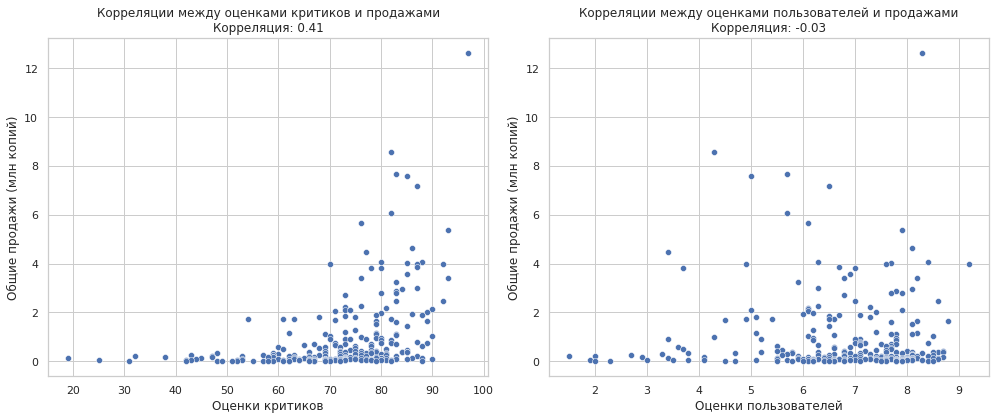

Платформа PS4: коэффициент корреляции между оценками критиков и продажами: 0.40656790206178095
Платформа PS4: коэффициент корреляции между оценками пользователей и продажами: -0.031957110204556376


In [37]:
# Рассчитываем корреляцию:
correlation_critic = ps4_data_clean_critic['critic_score'].corr(ps4_data_clean_critic['total_sales'])
correlation_user = ps4_data_clean_user['user_score'].corr(ps4_data_clean_user['total_sales'])

# Строим диаграммы рассеяния:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], data=ps4_data_clean_critic, x='critic_score', y='total_sales')
axes[0].set_title(f'Корреляции между оценками критиков и продажами\nКорреляция: {correlation_critic:.2f}')
axes[0].set_xlabel('Оценки критиков')
axes[0].set_ylabel('Общие продажи (млн копий)')

sns.scatterplot(ax=axes[1], data=ps4_data_clean_user, x='user_score', y='total_sales')
axes[1].set_title(f'Корреляции между оценками пользователей и продажами\nКорреляция: {correlation_user:.2f}')
axes[1].set_xlabel('Оценки пользователей')
axes[1].set_ylabel('Общие продажи (млн копий)')

plt.tight_layout()
plt.show()

print(f"Платформа PS4: коэффициент корреляции между оценками критиков и продажами: {correlation_critic}")
print(f"Платформа PS4: коэффициент корреляции между оценками пользователей и продажами: {correlation_user}")

#### **ВЫВОД:** 
На основании представленных графиков рассеяния и вычисленных коэффициентов корреляции можно сделать следующие выводы:
- **Корреляция между оценками критиков и общими продажами** составляет около 0.41, то есть связь средняя положительная. Значит, игры на платформе 'PS4' с более высокими оценками критиков склонны продаваться лучше. На графике видно, что многие из самых успешных игр имеют высокие оценки критиков (выше 70-80 баллов).
- **Корреляция между оценками пользователей и общими продажами на 'PS4'** составляет около -0.03. Значит, связь практически отсутствует. На графике видно, что продажи игр меньше зависят от оценок пользователей, и высокие продажи встречаются при разных оценках.

### Диаграмма рассеяния и корреляция между отзывами и продажами на других платформах

In [38]:
# Фильтруем данные:
data_recent_years_clean = data_recent_years.copy()

# Приводим данные к типу float:
data_recent_years_clean['critic_score'] = data_recent_years_clean['critic_score'].astype(float)
data_recent_years_clean['user_score'] = data_recent_years_clean['user_score'].astype(float)

# Создаем функцию для расчета корреляций по платформам:
def calculate_correlations(data, platforms):
    results = []
    for platform in platforms:
        platform_data = data[data['platform'] == platform]
        if len(platform_data) > 1:
            with np.errstate(divide='ignore', invalid='ignore'):
                critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
                user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
        else:
            critic_corr = np.nan
            user_corr = np.nan
        results.append({
            'platform': platform,
            'user_corr': user_corr,
            'critic_corr': critic_corr
        })
    return pd.DataFrame(results)

platforms = data_recent_years_clean['platform'].unique()

# Рассчитываем корреляцию:
correlation_table = calculate_correlations(data_recent_years_clean, platforms)

# Фильтруем результаты, чтобы не показывать строки с обеими NaN корреляциями:
correlation_table = correlation_table.dropna(subset=['user_corr', 'critic_corr'], how='all')

correlation_table = correlation_table.sort_values(by='critic_corr', ascending=False)
print(correlation_table)

   platform  user_corr  critic_corr
4      XOne  -0.068925     0.416998
2       PS4  -0.031957     0.406568
5      WiiU   0.419330     0.376415
3       3DS   0.241504     0.357057
1      X360  -0.011742     0.350345
0       PS3   0.002394     0.334285
8       PSV   0.000942     0.254742
7        PC  -0.090552     0.197390
6       Wii   0.682942          NaN
10      PSP  -1.000000          NaN


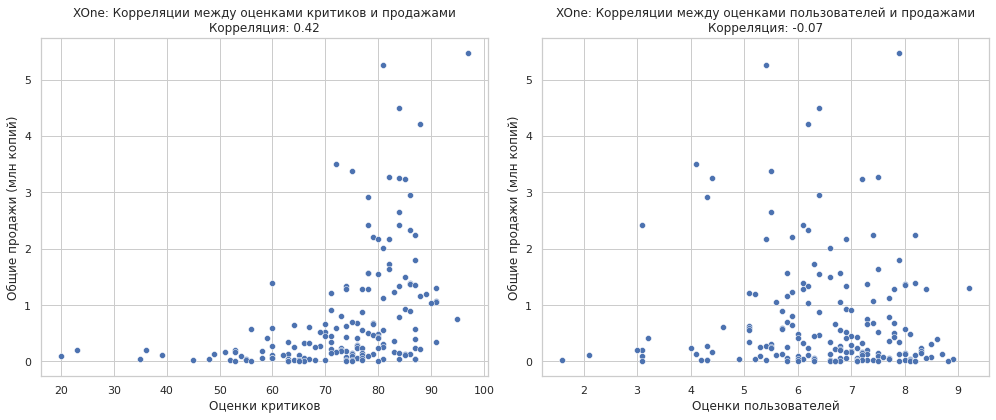

XOne: коэффициент корреляции между оценками критиков и продажами: 0.4169983280084017
XOne: коэффициент корреляции между оценками пользователей и продажами: -0.06892505328279414


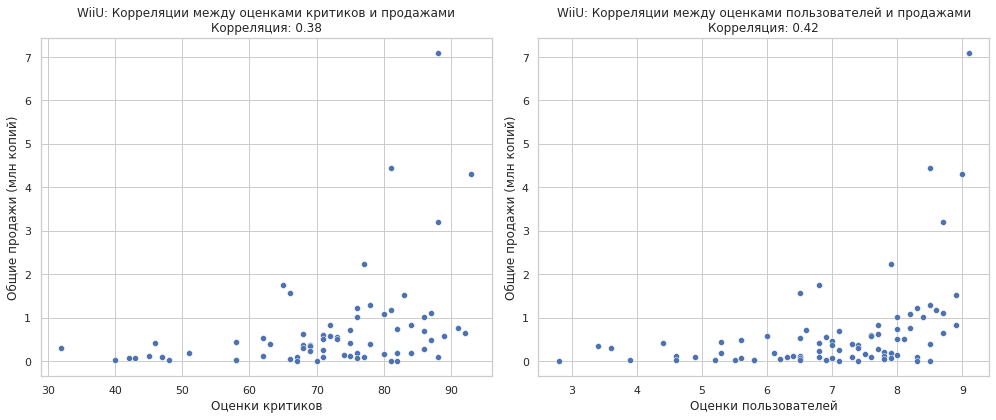

WiiU: коэффициент корреляции между оценками критиков и продажами: 0.3764149065423912
WiiU: коэффициент корреляции между оценками пользователей и продажами: 0.4193304819266187


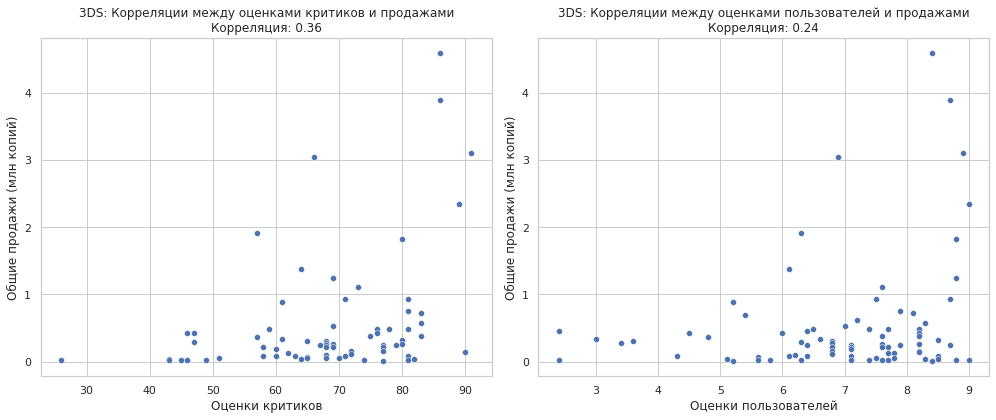

3DS: коэффициент корреляции между оценками критиков и продажами: 0.3570566142288103
3DS: коэффициент корреляции между оценками пользователей и продажами: 0.24150411773563016


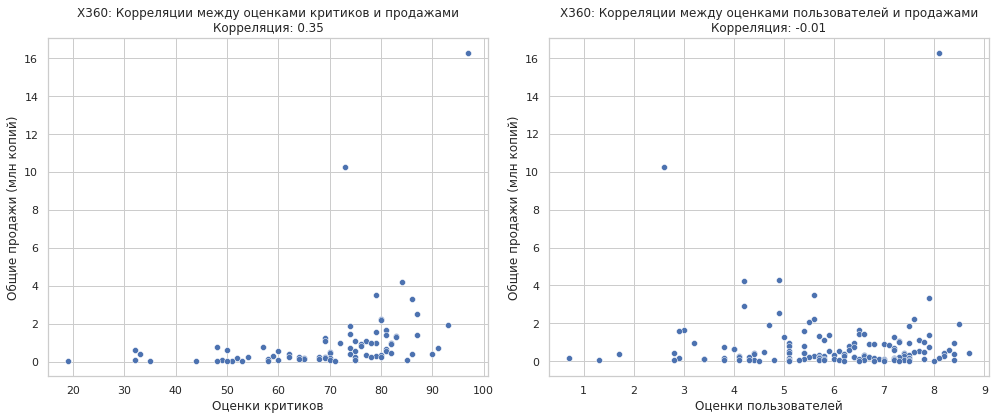

X360: коэффициент корреляции между оценками критиков и продажами: 0.3503445460228664
X360: коэффициент корреляции между оценками пользователей и продажами: -0.011742185147181342


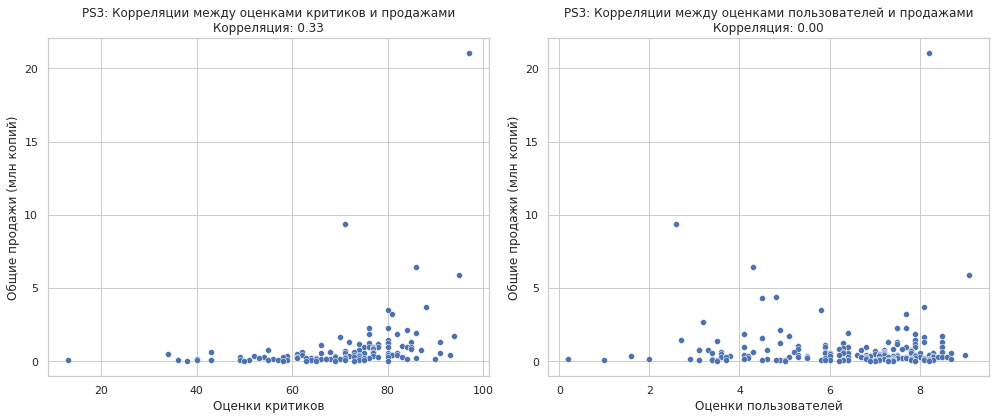

PS3: коэффициент корреляции между оценками критиков и продажами: 0.3342853393371919
PS3: коэффициент корреляции между оценками пользователей и продажами: 0.0023944027357566925


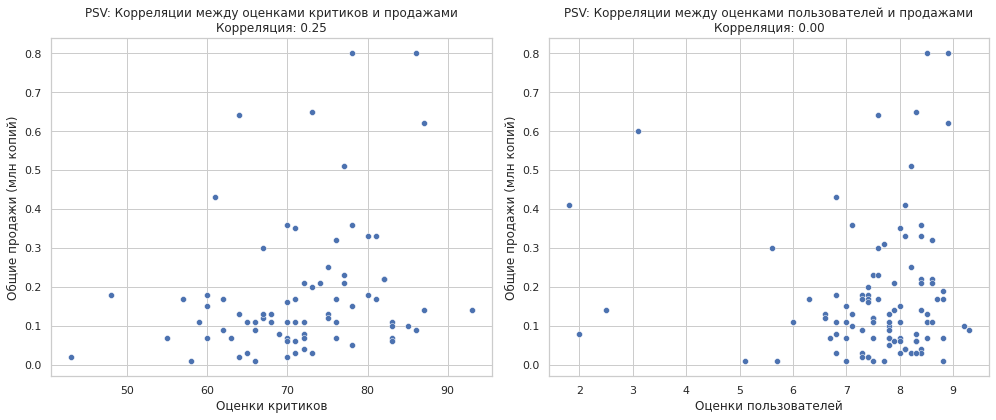

PSV: коэффициент корреляции между оценками критиков и продажами: 0.2547423503068656
PSV: коэффициент корреляции между оценками пользователей и продажами: 0.0009424723319108626


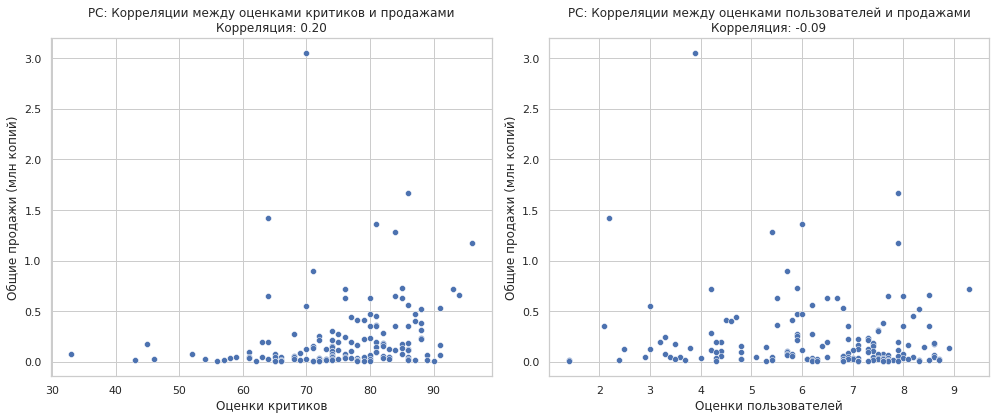

PC: коэффициент корреляции между оценками критиков и продажами: 0.19738952022740036
PC: коэффициент корреляции между оценками пользователей и продажами: -0.09055203515261169


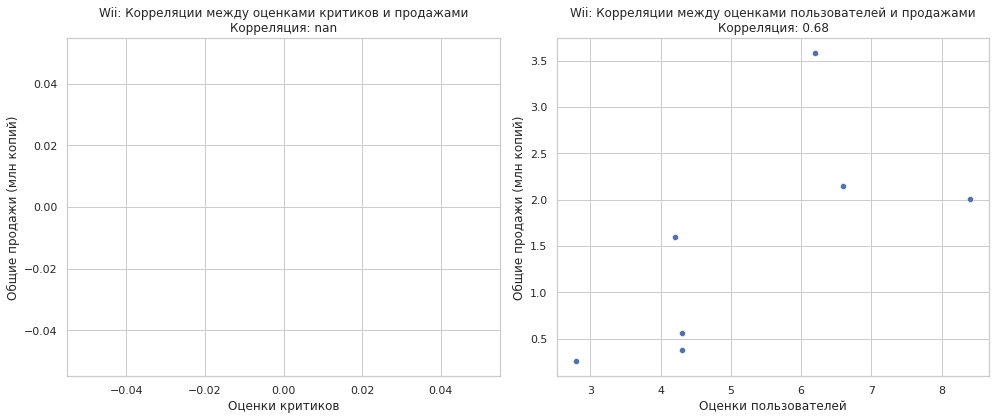

Wii: коэффициент корреляции между оценками критиков и продажами: nan
Wii: коэффициент корреляции между оценками пользователей и продажами: 0.6829417215362368


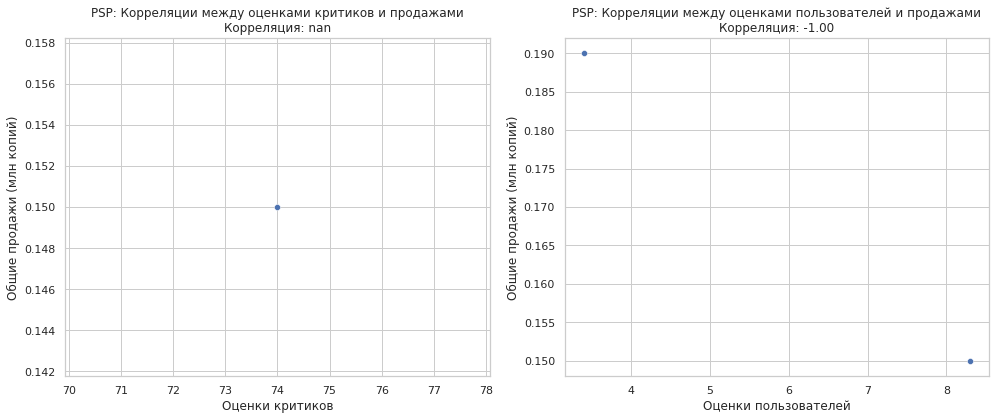

PSP: коэффициент корреляции между оценками критиков и продажами: nan
PSP: коэффициент корреляции между оценками пользователей и продажами: -0.9999999999999999


In [39]:
# Исключаем PS4 из диаграммы рассеяния, так как анализировали ее выше:
correlation_table = correlation_table[correlation_table['platform'] != 'PS4']

# Используем цикл, чтобы построить диаграммы рассеяния для каждой платформы:
for platform in correlation_table['platform']:
    platform_data = data_recent_years_clean[data_recent_years['platform'] == platform]
    critic_corr = correlation_table[correlation_table['platform'] == platform]['critic_corr'].values[0]
    user_corr = correlation_table[correlation_table['platform'] == platform]['user_corr'].values[0]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(ax=axes[0], data=platform_data, x='critic_score', y='total_sales')
    axes[0].set_title(f'{platform}: Корреляции между оценками критиков и продажами\nКорреляция: {critic_corr:.2f}')
    axes[0].set_xlabel('Оценки критиков')
    axes[0].set_ylabel('Общие продажи (млн копий)')

    sns.scatterplot(ax=axes[1], data=platform_data, x='user_score', y='total_sales')
    axes[1].set_title(f'{platform}: Корреляции между оценками пользователей и продажами\nКорреляция: {user_corr:.2f}')
    axes[1].set_xlabel('Оценки пользователей')
    axes[1].set_ylabel('Общие продажи (млн копий)')

    plt.tight_layout()
    plt.show()

    print(f"{platform}: коэффициент корреляции между оценками критиков и продажами: {critic_corr}")
    print(f"{platform}: коэффициент корреляции между оценками пользователей и продажами: {user_corr}")

#### **ВЫВОД:** 

На основании представленных графиков рассеяния и вычисленных коэффициентов корреляции можно сделать следующие выводы:
- Корреляция между оценками критиков и продажами:
    - **XOne** (около 0.42) и **PS4** (около 0.41): связь средняя положительная. Значит, игры на этих платформах с более высокими оценками критиков склонны продаваться лучше. 
    - **WiiU** (около 0.38), **3DS** (около 0.36), **X360**(около 0.35), **PS3** (около 0.33): связь слабая положительная. Она показывает важность и влияние оценок критиков для продаж на платформах.
    - **PSV** (около 0.25), **PС** (около 0.20): очень слабая положительная связь, которая говорит о небольшом влияние оценок критиков на продажи на платформах.
    - По **Wii** и **PSP** недостаточно данных для оценок.
    

- Корреляция между оценками пользователей и продажами:
    - **Wii** (около 0.68): сильная положительная связь. Значит, высокие оценки пользователей могут способствовать более высоким продажам на платформе.
    - **WiiU** (около 0.42): связь средняя положительная. Игры на этой платформе с более высокими оценками пользователей склонны продаваться лучше. 
    - **3DS** (около 0.24): очень слабая положительная связь, которая говорит о небольшом влияние оценок пользователей.
    - на остальных платформах очень низкая корреляция, указывающая на отсутствие влияния оценок пользователей на продажи.

Оценки критиков, в целом, имеют умеренную положительную корреляцию с продажами на большинстве платформ, в отличие от оценок пользователей. Это указывает на то, что высокие оценки от критиков чаще, чем от пользователей, могут способствовать более высоким продажам.

<font color='DarkGreen'>👌 Для оценки корреляции используем шкалу:</font>
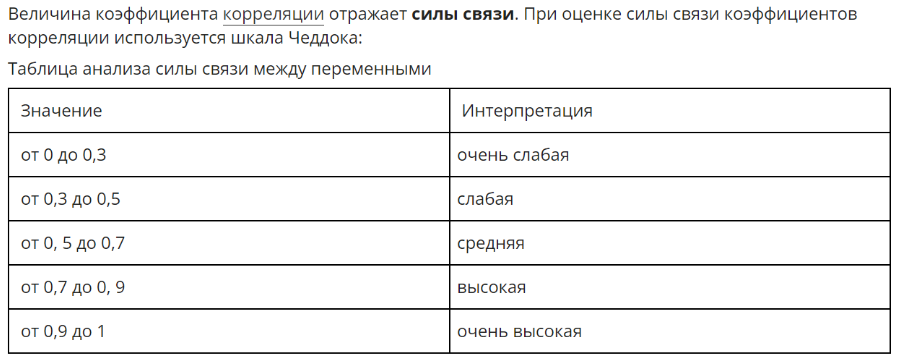

### Общее распределение игр по жанрам. 
 Что можно сказать о самых прибыльных жанрах? 
 Выделяются ли жанры с высокими и низкими продажами?

In [40]:
# Считаем количество игр в каждом жанре:
genre_counts = data_recent_years['genre'].value_counts()
genre_counts

Action          767
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

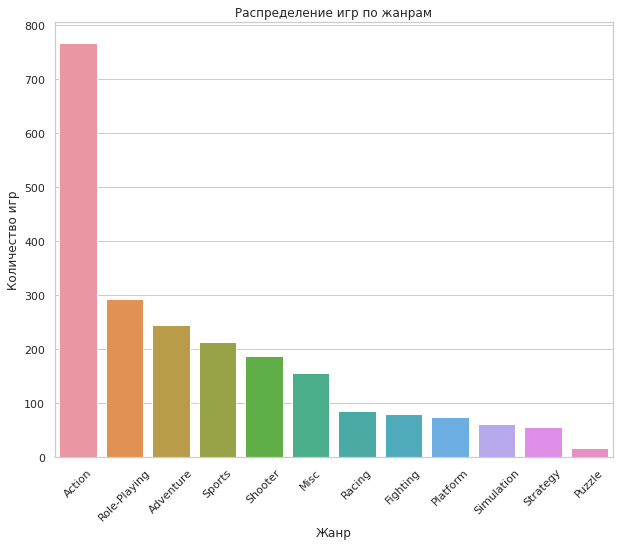

In [41]:
# Строим диаграмму распределения:
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Считаем общие продажи для каждого жанра:
genre_sales = data_recent_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          322.22
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

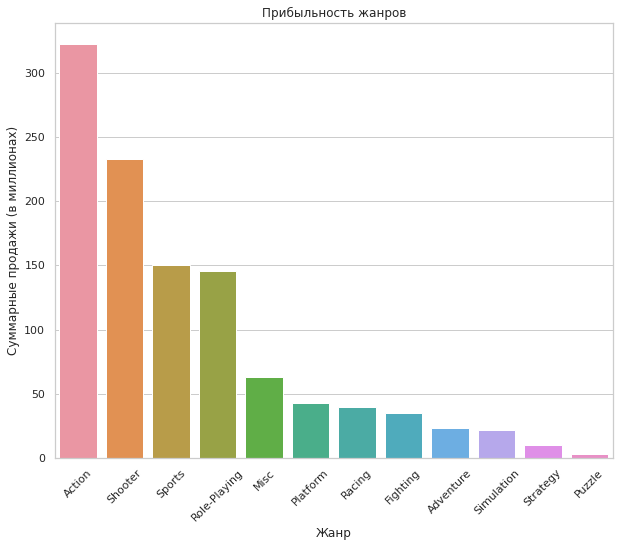

In [43]:
# Строим диаграмму прибыльности жанров:
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Прибыльность жанров')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи (в миллионах)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
    
Добавим сравнение медианных продаж, проиллюстрировав их диаграммами размаха.
</div>

In [44]:
# Считаем медианные продажи для каждого жанра:
genre_median_sales = data_recent_years.groupby('genre')['total_sales'].median().sort_values(ascending=False)
genre_median_sales

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

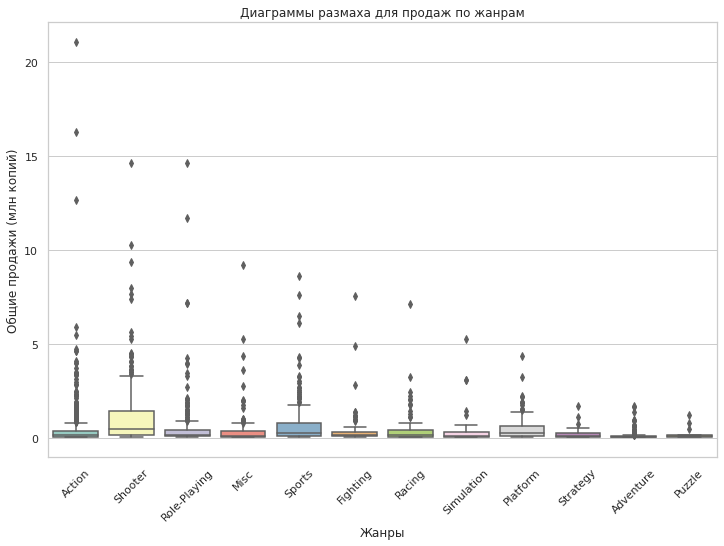

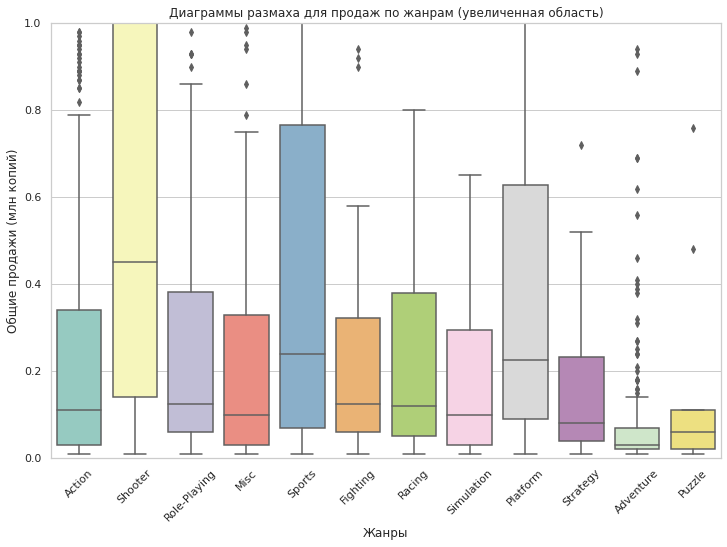

Медианные продажи по жанрам:
genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64

Промежуточные выводы:
Наиболее стабильные жанры с высоким медианным уровнем продаж:
Shooter: 0.44999999999999996 млн копий
Sports: 0.24000000000000002 млн копий
Platform: 0.22499999999999998 млн копий
Role-Playing: 0.125 млн копий
Fighting: 0.12499999999999999 млн копий
Racing: 0.12 млн копий
Action: 0.11 млн копий
Simulation: 0.1 млн копий
Misc: 0.09999999999999999 млн копий
Strategy: 0.08 млн копий
Puzzle: 0.06 млн копий
Adventure: 0.03 млн копий

Менее стабильные жанры с низким медианным уровнем продаж:
Action: 0.11 млн копий
Simulation: 0.1 млн копий
Misc: 0.09999999999999999 млн копий
Strategy: 0.08 млн копий
Puzzle: 0.06 млн копий
Adventure: 0.03 млн к

In [45]:
# Создаем диаграммы размаха для просмотра выбросов:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=data_recent_years, palette="Set3")

plt.title('Диаграммы размаха для продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи (млн копий)')
plt.xticks(rotation=45) 
plt.show()

# Создаем диаграммы размаха для просмотра медианы:
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='total_sales', data=data_recent_years, palette="Set3")

# Устанавливаем лимиты для оси Y:
plt.ylim(0, 1)

plt.title('Диаграммы размаха для продаж по жанрам (увеличенная область)')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи (млн копий)')
plt.xticks(rotation=45) 
plt.show()

# Промежуточные выводы с учетом медианных продаж:
genre_median_sales = genre_median_sales.sort_values(ascending=False)
print("Медианные продажи по жанрам:")
print(genre_median_sales)

print("\nПромежуточные выводы:")
print("Наиболее стабильные жанры с высоким медианным уровнем продаж:")
for genre, median_sales in genre_median_sales.iteritems():
    print(f"{genre}: {median_sales} млн копий")

print("\nМенее стабильные жанры с низким медианным уровнем продаж:")
for genre, median_sales in genre_median_sales.iteritems():
    if median_sales < genre_median_sales.median():
        print(f"{genre}: {median_sales} млн копий")

#### **ВЫВОД:** 
На основе графиков и анализа медианных продаж можно сделать следующие выводы о жанрах игр и их прибыльности. 

**Наиболее стабильные жанры с высоким медианным уровнем продаж:**
- Жанр Shooter (0.45 млн копий) демонстрирует самые высокие медианные продажи, что свидетельствует о стабильном и устойчивом интересе к ним, независимо от платформы.
- Жанры Platform (0.225 млн копий) и Sports (0.24 млн копий) также показывают хорошие медианные продажи, что указывает на стабильный спрос.

**Жанры со средним медианным уровнем продаж:**
- Жанры Role-Playing (0.125 млн копий), Fighting (0.125 млн копий), Racing (0.12 млн копий), Simulation (0.1 млн копий) имеют невысокие медианные продажи, тем не менее они остаются прибыльными и востребованными на рынке.
- Жанр Action (0.11 млн копий), несмотря на лидирующую позицию по общим продажам и количеству игр, имеет не такие высокие медианные продажи, что говорит о неоднородности интереса к играм этого жанра, то есть какие-то отдельные игры становятся очень популярными, но в целом сам жанр не относится к востребованным.

**Менее стабильные жанры:**
- Жанры Misc, Strategy, Puzzle и Adventure характеризуются самыми низкими медианными продажами, что указывает на менее стабильный и низкий спроc.

## Составим портрет пользователя каждого региона 

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы для пользователя каждого региона

In [46]:
# Создадим функцию для получения топ-5 платформ по продажам для каждого региона:
def top_platforms(data, region):
    return data.groupby('platform')[f'{region}_sales'].sum().sort_values(ascending=False).head(5)

# Топ-5 платформ для каждого региона
top_platforms_na = top_platforms(data_recent_years, 'na')
top_platforms_eu = top_platforms(data_recent_years, 'eu')
top_platforms_jp = top_platforms(data_recent_years, 'jp')

display(top_platforms_na)
display(top_platforms_eu)
display(top_platforms_jp)

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

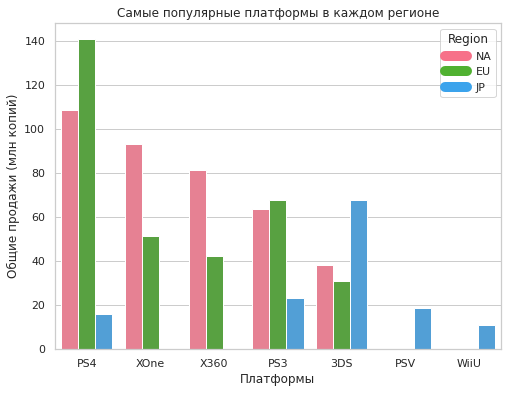

In [47]:
# Для визуальзации данных объединяем все топ-5 платформ в один датафрейм:
top_platforms_all = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], axis=1, sort=False).fillna(0)

# Переименовываем колонки для удобства:
top_platforms_all.columns = ['na_sales', 'eu_sales', 'jp_sales']

# Преобразуем данные для построения графика:
top_platforms_all = top_platforms_all.reset_index().melt(id_vars='platform', var_name='region', value_name='sales')

# Создаем график:
colors = sns.color_palette("husl", 3)
plt.figure(figsize=(8, 6))
sns.barplot(x='platform', y='sales', hue='region', data=top_platforms_all, palette=colors)
plt.title('Самые популярные платформы в каждом регионе')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи (млн копий)')
plt.legend(title='Регион', labels=['NA', 'EU', 'JP'], loc='upper right')

# Задаем цвета для легенды:
handles = [plt.Line2D([0], [0], color=colors[i], lw=10) for i in range(3)]
labels = ['NA', 'EU', 'JP']
plt.legend(handles=handles, labels=labels, title='Region', loc='upper right')

plt.show()

In [48]:
# Добавим доли продаж для каждого региона:
top_platforms_na = top_platforms_na / top_platforms_na.sum()
top_platforms_eu = top_platforms_eu / top_platforms_eu.sum()
top_platforms_jp = top_platforms_jp / top_platforms_jp.sum()

# Объединяем все топ-5 платформ в один датафрейм:
top_platforms_all = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], axis=1, sort=False).fillna(0)

# Переименовываем колонки для удобства:
top_platforms_all.columns = ['na_sales', 'eu_sales', 'jp_sales']

display(top_platforms_all)

,na_sales,eu_sales,jp_sales
platform,,,
PS4,0.282280,0.422463,0.116846
XOne,0.241732,0.154475,0.000000
X360,0.211983,0.127317,0.000000
PS3,0.164841,0.203042,0.170950
3DS,0.099164,0.092703,0.496449
PSV,0.000000,0.000000,0.136101
WiiU,0.000000,0.000000,0.079654


#### **ВЫВОД:**

Топ-5 самых популярных платформ по регионам и различия в долях продаж:  
- PS4 является самой популярной платформой в Европе и Северной Америке. При этом в Европе доля продаж PS4 значительно выше (42.2%), чем в Северной Америке (28.2%) и Японии (11.7%).  
- XOne занимает второе место в Северной Америке и Европе, но не входит в топ-5 в Японии. Доля продаж XOne в Северной Америке немного ниже PS4, в то время как в Европе доля продаж XOne меньше, чем PS4 более чем в два раза.
Что еще раз подчеркивает популярность платформы PS4 в Европе.  
- картина по X360 похожа на XOne.  
- платформа PS3 занимает стабильное место в топ-5 во всех регионах, но его доля выше в Европе (20.3%) и Японии (17.1%), чем в Северной Америке (16.5%).  
- Nintendo 3DS является лидером продаж в Японии (49.6%) и входит в топ-5 в Северной Америке и Европе, но с меньшими долями (9.9% и 9.3% соответственно).  
- PSV и WiiU присутствуют только в топ-5 в Японии, что свидетельствует о популярности этих платформ именно в этом регионе.

Таким образом, предпочтения по платформам сильно различаются между регионами:
- Европа предпочитает PlayStation;
- Северная Америка предпочитает PlayStation и Xbox;
- на рынке Японии самой популярной платформой является Nintendo.

### Самые популярные жанры (топ-5)

In [49]:
# Создадим функцию для получения топ-5 жанров по продажам для каждого региона:
def top_genres(data, region):
    return data.groupby('genre')[f'{region}_sales'].sum().sort_values(ascending=False).head(5)

# Топ-5 жанров для каждого региона
top_genres_na = top_genres(data_recent_years, 'na')
top_genres_eu = top_genres(data_recent_years, 'eu')
top_genres_jp = top_genres(data_recent_years, 'jp')

display(top_genres_na)
display(top_genres_eu)
display(top_genres_jp)

genre
Action          126.11
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

genre
Action          118.38
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

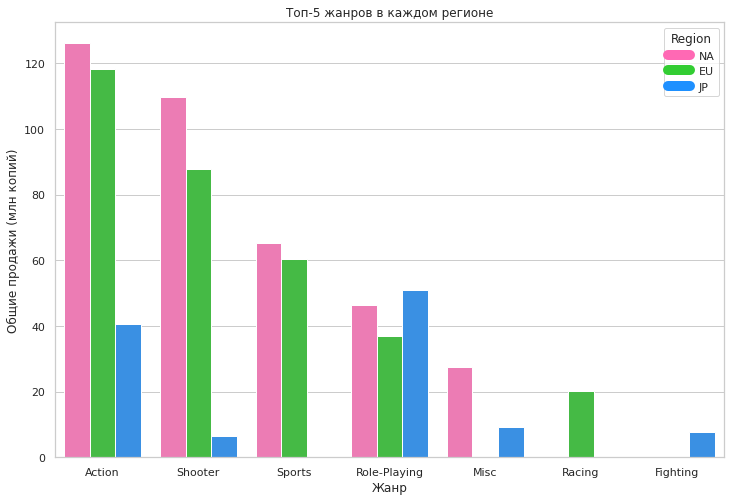

In [50]:
# Объединяем топ-5 жанров для каждого региона в один DataFrame:
top_genres_all = pd.concat([top_genres_na, top_genres_eu, top_genres_jp], axis=1, keys=['NA', 'EU', 'JP']).fillna(0)

# Преобразуем данные для построения графика:
top_genres_all = top_genres_all.reset_index().melt(id_vars='genre', var_name='region', value_name='sales')

# Создаем график:
colors = ['#FF69B4', '#32CD32', '#1E90FF']  # розовый, зеленый, голубой
plt.figure(figsize=(12, 8))
sns.barplot(x='genre', y='sales', hue='region', data=top_genres_all, palette=colors)
plt.title('Топ-5 жанров в каждом регионе')
plt.xlabel('Жанр')
plt.ylabel('Общие продажи (млн копий)')
handles = [plt.Line2D([0], [0], color=colors[i], lw=10) for i in range(3)]
labels = ['NA', 'EU', 'JP']
plt.legend(handles=handles, labels=labels, title='Region', loc='upper right')
plt.show()

<font color='DarkMagenta'>👉 Анализ по топ-5 лучше визуализировать круговой диаграммой, а продажи платформ/жанров не вошедших в топ, собирем в одной группе - "Другие", и по платформам, и по жанрам. На круговых диаграммах хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. Примерно вот так:</font>
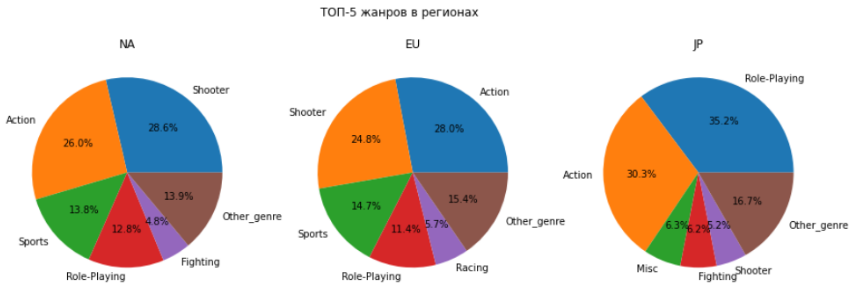

#### **ВЫВОД:**

- Мы видим схожесть в предпочтениях у пользователей из Северной Америки и Европы. 
Одинаковый топ-4 жанров: cамые популярные Action и Shooter, далее Sports и Role-Playing.

- В Японии лидирует жанр Role-Playing, что существенно отличает этот регион от других. Также жанр Fighting входит в топ-5 только в Японии.

Отличия в предпочтениях жанров могут быть связаны с культурными особенностями и традициями в каждом регионе.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

ESRB (Entertainment Software Rating Board),негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

In [54]:
# Поставим заглушку в данных:
data_esrb = data_recent_years.copy()
data_esrb['rating'].fillna('ND', inplace=True)

# Создадим функцию для получения суммарных продаж по рейтингам ESRB для каждого региона:
def esrb_sales_upd(data, region):
    return data.groupby('rating')[f'{region}_sales'].sum().sort_values(ascending=False)

# Продажи по рейтингам ESRB для каждого региона:
esrb_sales_na = esrb_sales_upd(data_esrb, 'na')
esrb_sales_eu = esrb_sales_upd(data_esrb, 'eu')
esrb_sales_jp = esrb_sales_upd(data_esrb, 'jp')

rating_order = ['M', 'ND', 'E', 'E10+', 'T']

# Переупорядочим данные в соответствии с желаемым порядком:
esrb_sales_na = esrb_sales_na[rating_order]
esrb_sales_eu = esrb_sales_eu[rating_order]
esrb_sales_jp = esrb_sales_jp[rating_order]

display(esrb_sales_na)
display(esrb_sales_eu)
display(esrb_sales_jp)

rating
M       165.27
ND       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

rating
M       145.57
ND       78.91
E        83.36
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

rating
M       14.11
ND      85.05
E       15.14
E10+     5.89
T       20.59
Name: jp_sales, dtype: float64

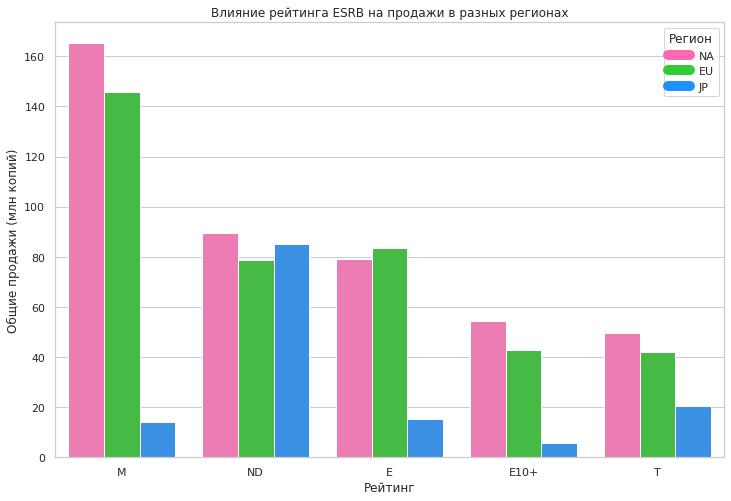

In [55]:
# Объединим данные в один DataFrame для построения графика:
esrb_sales_all = pd.DataFrame({
    'rating': esrb_sales_na.index,
    'NA_sales': esrb_sales_na.values,
    'EU_sales': esrb_sales_eu.values,
    'JP_sales': esrb_sales_jp.values
})

# Преобразуем данные для использования с seaborn:
esrb_sales_all = esrb_sales_all.melt(id_vars='rating', var_name='region', value_name='sales')

# Создаем график:
colors = ['#FF69B4', '#32CD32', '#1E90FF']  # розовый, зеленый, голубой
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='sales', hue='region', data=esrb_sales_all, palette=colors)
plt.title('Влияние рейтинга ESRB на продажи в разных регионах')
plt.xlabel('Рейтинг')
plt.ylabel('Общие продажи (млн копий)')
handles = [plt.Line2D([0], [0], color=colors[i], lw=10) for i in range(3)]
labels = ['NA', 'EU', 'JP']
plt.legend(handles=handles, labels=labels, title='Регион', loc='upper right')
plt.show()

#### **ВЫВОД:**

Рейтинг ESRB значительно влияет на продажи в Северной Америке и Европе. 
Игры с рейтингом M (Mature) для взрослой аудитории являются наиболее продаваемыми в этих регионах. 

В Японии у большинства игр нет рейтинга (ND). Это важно учитывать, так как система рейтингов ESRB предназначена для США и Канады, и логично, что для других регионов она может не заполняться. Поэтому мы можем предположить, что рейтинг ESRB не имеет значительного влияния на продажи в данном регионе.

В США и Европе также много игр без рейтинга, но их продажи ниже, чем у игр с рейтингом.

Далее в Северной Америке и Европе следуют игры с рейтингом E (Everyone), что указывает на высокий спрос на игры для всех возрастов.

Если брать игры с рейтингом ESRB, то в Японии наиболее популярными являются игры T (Teen), что может отражать различия в культурных предпочтениях и восприятии контента.

## Сформулируем и проверим гипотезы

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Нулевая гипотеза (H0):** средние пользовательские рейтинги платформ Xbox One и PC равны.
- **Альтернативная гипотеза (H1):** средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [56]:
# Проверяем гипотезу с использованием t-теста для двух независимых выборок с альтернативной гипотезой:

# Берем выборки пользовательских рейтингов для Xbox One и PC:
xbox_one_user_scores = data_recent_years[data_recent_years['platform'] == 'XOne']['user_score'].dropna()
pc_user_scores = data_recent_years[data_recent_years['platform'] == 'PC']['user_score'].dropna()

# Выводим средние значения выборок:
print(f'Среднее пользовательских рейтингов для Xbox One: {np.mean(xbox_one_user_scores)}')
print(f'Среднее пользовательских рейтингов для PC: {np.mean(pc_user_scores)}')

# Выбранный уровень статистической значимости:
alpha = 0.05

# Применяем t-тест для двух независимых выборок:
results = stats.ttest_ind(
    xbox_one_user_scores, 
    pc_user_scores, 
    alternative='two-sided'
)

# Выводим полученное p-value:
print('p-значение:', results.pvalue)

# Посмотрим вывод об отвержении или неотвержении нулевой гипотезы:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее пользовательских рейтингов для Xbox One: 6.521428571428572
Среднее пользовательских рейтингов для PC: 6.283974358974358
p-значение: 0.16390354211387628
Не получилось отвергнуть нулевую гипотезу


#### **ВЫВОД:**
Для проверки гипотезы был использован t-тест для двух независимых выборок, потому что рейтинги для платформ Xbox One и PC являются независимыми выборками, он предполагает нормальность распределения данных и хорошо работает при различных размерах выборок.

- Мы не отвергаем нулевую гипотезу. Это означает, что у нас нет статистически значимых доказательств того, что средние пользовательские рейтинги для платформ Xbox One и PC различаются. 
- Соответственно, мы можем предположить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
- **Нулевая гипотеза (H0):** средние пользовательские рейтинги жанров Action и Sports равны.
- **Альтернативная гипотеза (H1):** средние пользовательские рейтинги жанров Action и Sports не равны.

In [57]:
# Проверяем гипотезу с использованием t-теста для двух независимых выборок с альтернативной гипотезой:
# Берем выборки пользовательских рейтингов для жанров Action и Sports
action_user_scores = data_recent_years[data_recent_years['genre'] == 'Action']['user_score'].dropna()
sports_user_scores = data_recent_years[data_recent_years['genre'] == 'Sports']['user_score'].dropna()

# Выводим средние значения выборок:
print(f'Среднее пользовательских рейтингов для жанра Action: {np.mean(action_user_scores)}')
print(f'Среднее пользовательских рейтингов для жанра Sports: {np.mean(sports_user_scores)}')

# Выбранный уровень статистической значимости:
alpha = 0.05

# Применяем t-тест для двух независимых выборок:
results = stats.ttest_ind(
    action_user_scores, 
    sports_user_scores, 
    alternative='two-sided'
)

# Выводим полученное p-value:
print('p-значение:', results.pvalue)

# Посмотрим вывод об отвержении или неотвержении нулевой гипотезы:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее пользовательских рейтингов для жанра Action: 6.841794871794871
Среднее пользовательских рейтингов для жанра Sports: 5.238124999999999
p-значение: 7.68963684307543e-28
Отвергаем нулевую гипотезу


#### **ВЫВОД:**
Для проверки гипотезы был использован t-тест для двух независимых выборок.

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Итоговый вывод

Целью проекта было выявление закономерностей, определяющих успешность игр, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

В нашем распоряжении были исторические данные  с 1980 по 2016 годы о продажах игр (млн копий), оценках пользователей и экспертов, жанрах и платформах в различных регионах, но в особненности в Северной Америке, Европе и Японии.

В ходе исследования были проведены предобработка данных, исследовательский и статистический анализы данных.

**Результат Предобработки данных:**
- Мы преобразовали названия всех столбцов к нижнему регистру;
- Мы изменили тип данных в стобцах 'year_of_release' (на int64), 'critic_score' (на int64), 'user_score'(на float);
- Удалили 1 неявный дубликат.
- Обработали пропуски:
    - удалили 2 строки в столбцах 'name', 'genre';
    - дополнили данные в 'year_of_release' годами из названий игр и удалили остальные пропуски;
    - заменили пропуски в 'critic_score', 'user_score', 'rating' и 'tbd' на 'pd.NA' для унифицированного представления пропусков в различных типах данных. Это позволит сохранить информацию о наличии пропусков, не искажая данные.
    - для пропусков в рейтингах ESRB была использована заглушка "ND" (No Data).  
**Причины появления пропусков:** 
 - столбцы 'name','genre', 'year_of_release': небольшое количество пропусков может быть связаны с человеческим фактором (некорректное заполнение данных, сложность в определении жанра) или отсутствием информации в открытых источниках.
- столбцы 'critic_score', 'user_score': игра не была достаточно интересна или популярна, чтобы привлечь внимание для оценки пользователями или критиками. Или на момент создания данных игра недавно вышла и не успела получить оценки. Могли быть также технические ошибки при сохранении данных или человеческий фактор.
- 'rating': ESRB (Entertainment Software Rating Board),ассоциация, определяющая возрастной рейтинг компьютерных игр была основана в September 16, 1994 для США и Канады, поэтому игры, выпущенные ранее, могли не иметь рейтинга или были выпущены в других странах.

**Основые характеристики датасета:** 
- Большинство игр выпущено после 2000 года, пик приходится на период 2005-2010 годов, что может говорить о росте игровой индустрии в этот период.
- Наиболее высокие продажи игр в Северной Америке, затем в Европе и наименьшие в Японии и других регионах. Присутствует небольшое число игр с очень высокими продажами:
- 'na_sales': средние продажи составляют 0.264 млн копий. Большинство значений значительно меньше 1 млн копий, также содержатся выбросы в десятки миллионов копий. Максимальные продажи достигают 41.36 млн копий.
- 'eu_sales': большинство значений также меньше 1 млн копий, содержатся выбросы в десятки миллионов копий. Средние продажи составляют 0.146 млн копий. Максимальные продажи меньше, чем в NA и достигают максимум 28.96 млн копий.
- 'jp_sales': большинство значений также меньше 1 млн копий с меньшим количеством выбросов. Средние продажи составляют 0.078 млн копий. Максимальные продажи достигают 10.22 млн копий.
- 'other_sales': большинство значений в других регионах также меньше 1 млн копий, средние продажи составляют 0.048 млн копий. Максимальные продажи достигают 10.57 млн копий.
- 'total_sales': средние суммарные продажи составляют 0.536 млн копий, максимальные суммарные продажи достигают 82.54 млн копий.
- Большинство игр получают оценки в диапазоне 65-80 от критиков и 6-8 от пользователей. Это означает, что оценки в большинстве своем положительные. 


**Результат Исследовательского анализа данных:**  
Количество выпускаемых игр:
- С 1980 по 1993 годы игровая индустрия только начинала развиваться и выпускалось от 9 до 60 игр.
- С 1994 года по 2001 год мы наблюдаем относительно стабильный рост игр от 121 релиза в год до 482 (в 2001 г).
- Далее мы видим резкий рост с 2002 года (830 игр против 482 в 2001 году), который достиг пика в 2008-2009 годах (1429 и 1427 игр соответственно).
- Начиная с 2010 года (1255 игр), количество выпущенных игр начало снижаться: 2011 год - 1137 игр и резкое падение почти в два раза в 2012 году (652 игры).
- Тем не менее, несмотря на общий спад, последние 5 лет наблюдается относительно стабильное количество релизов: диапазон от 502 до 652 игр в год.

Изменения продаж на платформах:
- Платформы PS2, X360, PS3, Wii, DS, PS показывали наибольшие суммарные продажи в разные годы.
- Средний срок появления новых платформ составляет около 7 лет.
- В среднем, новые платформы начинают показывать рост продаж через 1-2 года после выпуска.
- После 5-7 лет успешных продаж у платформ начинается спад. Период спада может длиться 2-3 года, после чего платформы полностью исчезают с рынка.

Для анализа успешности игр и планирования рекламных кампаний на 2017 год мы выбрали период с 2013 по 2016 годы, чтобы учитывать быстрое развитие технологий, современные тенденции и изменения на рынке.  

**Лидеры продаж:**  
Из данных за период 2013-2016 годов видно, что лидерами по суммарным продажам являются платформы:
- PS4: 314.14 млн копий
- PS3: 181.43 млн копий
- XOne: 159.32 млн копий
- 3DS: 143.25 млн копий
- X360: 136.80 млн копий

**Какие платформы растут?**
- PlayStation 4:в целом жизненный цикл платформы находится в стадии зрелости и у платформы есть основания несколько лет оставаться лидером продаж и возможно показать рост.
- Xbox One: продажи этой платформы также показывают рост. Несмотря на снижение в 2016 году, в целом жизненный цикл платформы находится в стадии зрелости и у платформы есть основания несколько лет показывать рост или стабильные высокие продажи.
- Консоль WiiU показала пик продаж во второй и третий годы, однако общий уровень продаж ниже, чем у лидеров. Хотя возможно некоторое увеличение стабильности, значительного роста не ожидается.

**Какие платформы падают?**
- Продажи PS3 падают, так как PS4 взяла на себя лидирующие позиции.
- 3DS, X360 (заменяется на XOne) показывают ежегодное устойчивое снижение продаж.
- PSV, Wii, PSP и DS: продажи очень низкие или практически отсутствуют, что указывает на окончание жизненного цикла этих платформ.

**Стабильность:**
PC: На протяжении всего периода мы наблюдаем относительно стабильные продажи. В 2016 году они находятся на 4 месте среди популярных платформ.

**Глобальные продажи игр:**
- Самые высокие медианные продажи: Xbox 360, Xbox One, PlayStation 4.
- Средние медианные продажи: Wii, DS, PS3.
- Низкие медианные продажи: 3DS, PC.  

**Оценки критиков и пользователей:**
Высокие оценки от критиков чаще способствуют высоким продажам, чем оценки от пользователей.

**Жанры игр и их прибыльность:**
Наиболее стабильные жанры с высоким медианным уровнем продаж:
- Shooter (0.45 млн копий)
- Platform (0.225 млн копий)
- Sports (0.24 млн копий)

Жанры со средним медианным уровнем продаж:
- Role-Playing (0.125 млн копий)
- Fighting (0.125 млн копий)
- Racing (0.12 млн копий)
- Simulation (0.1 млн копий)
- Action (0.11 млн копий)

Менее стабильные жанры:
- Misc, Strategy, Puzzle, Adventure

**Портреты пользователей по регионам:**  
Северная Америка (NA):
- Популярные платформы: PS4, XOne, X360, PS3, 3DS.
- Популярные жанры: Shooter, Sports, Platform.
- Высокие продажи игр с рейтингом M (Mature).  

Европа (EU):
- Популярные платформы: PS4, XOne, PS3, X360, 3DS.
- Популярные жанры: Shooter, Sports, Platform.
- Высокие продажи игр с рейтингом M (Mature).  

Япония (JP):
- Популярные платформы: 3DS, PS3, PS4, PSV, WiiU.
- Популярные жанры: Role-Playing, Fighting, Platform.
- Высокие продажи игр с рейтингом T (Teen).

**Влияние рейтинга ESRB на продажи:**
- В Северной Америке и Европе: Игры с рейтингом M (Mature) наиболее продаваемые.
- В Японии большинство игр без рейтинга (ND), но по ESRB популярны игры с рейтингом T (Teen).

**Статистический анализ данных:**
Мы проверили гипотезы и получили результат:
- На уровне значимости 5% средние пользовательские рейтинги для платформ Xbox One и PC равны.
- На уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

**Рекомендации для рекламного отдела:**
- Регионы для рекламы: Северная Америка, Европа, Япония.
- Обращать внимание на высокие оценки критиков, они могут способствовать высоким продажам.
- Обращать внимание на рейтинг ESRB для Северной Америки и Европы (M (Mature), T (Teen) для Японии.

Учитывая особенности в регионах, а также стабильность, продажи и перспективность платформ
рекомендуем выбирать на 2017 год:  
Северная Америка (NA):
- Платформы для рекламы: PS4, Xbox One, X360.
- Жанры для рекламы: Shooter, Sports, Platform.

Европа (EU):
- Платформы для рекламы: PS4, PS3, Xbox One.
- Жанры для рекламы: Shooter, Sports, Platform.

Япония (JP):
- Платформы для рекламы: 3DS, PS4, PS3.
- Жанры для рекламы: Role-Playing, Fighting, Platform.